In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

In [11]:
df=pd.read_csv("C:/Users/LG/Desktop/ML_Study(회기)/glass.csv")

In [15]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [17]:
df.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [26]:
df.shape

(214, 11)

In [18]:
# glass_type 1, 2, 3 are window glass
# glass_type 5, 6, 7 are non-window glass
df['household'] = df.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


Text(0, 0.5, 'household')

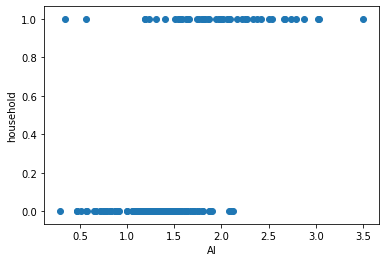

In [21]:
plt.scatter(df.Al, df.household)
plt.xlabel('Al')
plt.ylabel('household')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df[['Al']],df.household,train_size=0.7)

In [24]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(149, 1) (65, 1) (149,) (65,)


In [28]:
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression()

In [29]:
fit=linear_model.fit(X_train,y_train)

In [32]:
glss_df=X_train[['Al']]
glass_df['household_actual']=y_train

In [34]:
glass_df['household_pred_linear']=linear_model.predict(X_train)

In [35]:
linear_model.predict(X_train)[0:15]

array([-0.05653745,  0.53072989, -0.11945895,  0.48353876,  0.12174014,
        0.1636878 ,  0.23709622,  0.18466164,  0.33672193,  0.13222705,
        0.10600976,  0.12174014, -0.24530195,  0.01162751, -0.07751128])

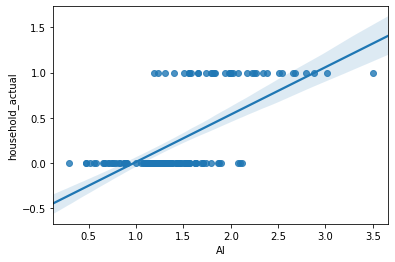

In [36]:
sns.regplot(x='Al', y='household_actual', data=glass_df, logistic=False)

In [49]:
logit_model=LogisticRegression(class_weight='balanced')
fit2=logit_model.fit(X_train,y_train)

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
logit_model.predict(X_train)[:15]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
logit_model.predict_proba(X_train)[:15]

array([[0.8255747 , 0.1744253 ],
       [0.27859829, 0.72140171],
       [0.86093578, 0.13906422],
       [0.3208105 , 0.6791895 ],
       [0.68865325, 0.31134675],
       [0.64904181, 0.35095819],
       [0.57482846, 0.42517154],
       [0.62839319, 0.37160681],
       [0.46915236, 0.53084764],
       [0.6789783 , 0.3210217 ],
       [0.70286032, 0.29713968],
       [0.68865325, 0.31134675],
       [0.91373257, 0.08626743],
       [0.77966362, 0.22033638],
       [0.83808981, 0.16191019]])

In [52]:
logit_model.predict(X_test)[:15]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [53]:
logit_model.predict_proba(X_test)[:15]

array([[0.62315343, 0.37684657],
       [0.46358396, 0.53641604],
       [0.51385973, 0.48614027],
       [0.45802463, 0.54197537],
       [0.54728418, 0.45271582],
       [0.33560893, 0.66439107],
       [0.65916607, 0.34083393],
       [0.65916607, 0.34083393],
       [0.54728418, 0.45271582],
       [0.69816622, 0.30183378],
       [0.85270281, 0.14729719],
       [0.61258815, 0.38741185],
       [0.6789783 , 0.3210217 ],
       [0.5417348 , 0.4582652 ],
       [0.34061624, 0.65938376]])

In [54]:
glass_df['household_pred_log'] = logit_model.predict(X_train)

In [55]:
glass_df['household_pred_prob_log'] = logit_model.predict_proba(X_train)[:,1]

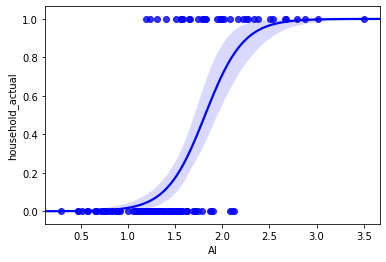

In [56]:
sns.regplot(x='Al', y='household_actual', data=glass_df, logistic=True, color='b')

In [59]:
glass_df.head()

,Al,household_actual,household_pred_linear,household_pred_log,household_pred_prob_log
67,0.87,0,-0.056537,0,0.174425
203,1.99,1,0.530730,1,0.721402
161,0.75,0,-0.119459,0,0.139064
79,1.90,0,0.483539,1,0.679189
35,1.21,0,0.121740,0,0.311347


In [58]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 67 to 85
Data columns (total 5 columns):
Al                         149 non-null float64
household_actual           149 non-null int64
household_pred_linear      149 non-null float64
household_pred_log         149 non-null int64
household_pred_prob_log    149 non-null float64
dtypes: float64(3), int64(2)
memory usage: 7.0 KB


In [60]:
logit_model.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [62]:
predict = logit_model.predict(X_test)

In [68]:
print (metrics.confusion_matrix(y_test, predict))

[[43  8]
 [ 4 10]]


In [69]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy
    return(acc)

In [70]:
cfmat=confusion_matrix(y_test,predict)

In [71]:
acc(cfmat)

0.8153846153846154

In [73]:
print (metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        51
           1       0.56      0.71      0.63        14

    accuracy                           0.82        65
   macro avg       0.74      0.78      0.75        65
weighted avg       0.84      0.82      0.82        65



In [74]:
iv = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']

In [75]:
logReg = sm.Logit(df.household,df[iv])
fit3 = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.133979
         Iterations 10


In [76]:
fit3.params

RI   -48.738576
Na     0.763087
Mg    -2.173391
Al     5.278239
Si     0.880383
K     -0.945696
Ca    -0.385779
Ba     0.645089
Fe    -8.664241
dtype: float64

In [77]:
np.exp(fit3.params)

RI    6.809344e-22
Na    2.144886e+00
Mg    1.137911e-01
Al    1.960243e+02
Si    2.411822e+00
K     3.884092e-01
Ca    6.799209e-01
Ba    1.906156e+00
Fe    1.726505e-04
dtype: float64